# 2D Deep CNN

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from PIL import Image
import glob 
import PIL
import keras 
import tensorflow as tf #importing tensorflow as backend
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio 
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D,MaxPool2D,BatchNormalization
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from sklearn.utils import shuffle

In [7]:
X=[]
y=[]
img_dir = "/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/class1_images/class1_images.zip (Unzipped Files)/class1_images"
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(0)
img_dir = "/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/class2_images/class2_images.zip (Unzipped Files)/class2_images"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(1)
img_dir = "/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/class3_images/class3_images.zip (Unzipped Files)/class3_images"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(2)

In [8]:
X=np.asarray(X)
y=np.asarray(y)
X=X/255.0

In [9]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)
train_X,valid_X,train_y,valid_y=train_test_split(train_X,train_y,test_size=1/8,train_size=7/8,random_state=0)

In [10]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 8, kernel_size = (3,3), input_shape=(128, 128, 3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(3, 3), padding='same'))
  #model.add(Activation('relu'))
  
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(Flatten())
  
  model.add(Dense(128))
  model.add(Activation('relu'))
  
  model.add(Dense(64))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  
  model.add(Dense(32))
  model.add(Activation('relu'))
  
  model.add(Dense(16))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  
  model.add(Dense(3))
  model.add(Activation('softmax'))
  return model

In [11]:
modelf=create_model()
modelf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
activation (Activation)      (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 32)        0

In [12]:
modelf.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=modelf.fit(train_X, train_y, epochs=30, batch_size=15,validation_data=(valid_X,valid_y))
print(history)

Epoch 1/30
34/34 [==============================] - 22s 636ms/step - loss: 1.1043 - accuracy: 0.3307 - val_loss: 1.0993 - val_accuracy: 0.3014
Epoch 2/30
34/34 [==============================] - 21s 631ms/step - loss: 1.0945 - accuracy: 0.3743 - val_loss: 1.0880 - val_accuracy: 0.3014
Epoch 3/30
34/34 [==============================] - 22s 635ms/step - loss: 1.0777 - accuracy: 0.4574 - val_loss: 1.0466 - val_accuracy: 0.8904
Epoch 4/30
34/34 [==============================] - 22s 633ms/step - loss: 1.0252 - accuracy: 0.5762 - val_loss: 0.9916 - val_accuracy: 0.3288
Epoch 5/30
34/34 [==============================] - 22s 633ms/step - loss: 0.9556 - accuracy: 0.6000 - val_loss: 0.7860 - val_accuracy: 0.9863
Epoch 6/30
34/34 [==============================] - 22s 634ms/step - loss: 0.8251 - accuracy: 0.6653 - val_loss: 0.5551 - val_accuracy: 0.9863
Epoch 7/30
34/34 [==============================] - 22s 636ms/step - loss: 0.6761 - accuracy: 0.7545 - val_loss: 0.4549 - val_accuracy: 0.9178

Text(0.5, 0, 'Epochs')

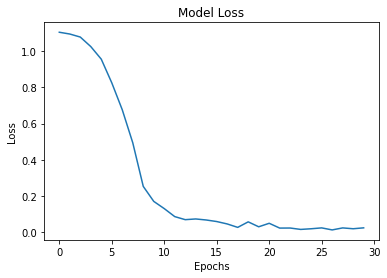

In [13]:
#plotting the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')


In [14]:
#Confusion Matrix
test_y=test_y+1
y_pred=np.argmax(modelf.predict(test_X), axis=-1)+1
cm=pd.crosstab(test_y,y_pred)
print("Confusion matrix:\n")
cm

Confusion matrix:



col_0,1,2,3
row_0,,,
1,41,0,1
2,0,58,0
3,0,0,45


In [15]:
print("Individual class accuracy:")
cm=confusion_matrix(test_y,y_pred)
for i in range(3):
  print(f'Class {i+1} accuracy: ', end="")
  print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy

Individual class accuracy:
Class 1 accuracy: 97.61904761904762
Class 2 accuracy: 100.0
Class 3 accuracy: 100.0


In [16]:
print(f"Overall Accuracy: {np.sum(y_pred==test_y)/len(test_y) *100}%")

Overall Accuracy: 99.3103448275862%


In [17]:
def call_model(tr_x,tr_y):
  modelk=create_model()
  modelk.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  modelk.fit(tr_x,tr_y, epochs=20, batch_size=15,verbose=0,shuffle=False)
  return modelk

In [19]:
j=1
Xs, ys = shuffle(X, y,random_state=0)
kf=KFold(n_splits=10)
accs = 0
for train,test in kf.split(Xs):
    print()
    print(f"Fold {j}:")
    j=j+1
    tr_x,tr_y,ts_x,ts_y=Xs[train],ys[train],Xs[test],ys[test]
    tf.compat.v1.disable_eager_execution()
    y_pred=np.argmax(call_model(tr_x,tr_y).predict(ts_x), axis=-1)
    cm=confusion_matrix(ts_y,y_pred)
    print("Confusion matrix:")
    print(cm)
    print("Individual class accuracy:")
    for i in range(3):
        print(f"Class {i+1}: ", end = "")
        print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy
    acc = np.sum(y_pred==ts_y)/len(ts_y)
    accs += acc
    print(f"Overall Accuracy: {acc*100}%")
    print("====================================")

print(f"Average Accuracy: {accs*100/10}%")


Fold 1:
Confusion matrix:
[[20  0  0]
 [ 0 28  1]
 [ 0  0 24]]
Individual class accuracy:
Class 1: 100.0
Class 2: 96.55172413793103
Class 3: 100.0
Overall Accuracy: 98.63013698630137%

Fold 2:
Confusion matrix:
[[21  1  0]
 [ 0 30  0]
 [ 0  0 21]]
Individual class accuracy:
Class 1: 95.45454545454545
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 98.63013698630137%

Fold 3:
Confusion matrix:
[[22  0  0]
 [ 1 22  0]
 [ 1  0 27]]
Individual class accuracy:
Class 1: 100.0
Class 2: 95.65217391304348
Class 3: 96.42857142857143
Overall Accuracy: 97.26027397260275%

Fold 4:
Confusion matrix:
[[29  0  0]
 [ 0 26  0]
 [ 0  0 17]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%

Fold 5:
Confusion matrix:
[[24  0  0]
 [ 0 28  0]
 [ 0  0 20]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%

Fold 6:
Confusion matrix:
[[21  0  0]
 [ 0 28  0]
 [ 0  0 23]]
Individual class accuracy:
Class 1: 100.0
Class